In [114]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [48]:
#Col_list=["LeagueIndex","Age","HoursPerWeek","APM","SelectByHotkeys",
#                    "AssignToHotkeys","UniqueHotkeys",
#                    "MinimapAttacks","MinimapRightClicks","NumberOfPACs",
#                    "GapBetweenPACs","ActionLatency",
#                    "ActionsInPAC","TotalMapExplored","WorkersMade","UniqueUnitsMade",
#                    "ComplexUnitsMade"]
df=pd.read_csv("SkillCraft1_Dataset.csv")
#df = df[Col_list]
df.dropna()
df = df[df['LeagueIndex']!=8]


In [5]:
df.head()

,LeagueIndex,Age,HoursPerWeek,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade
0,5,27,10,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0
1,5,23,10,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0.0
2,4,30,10,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0
3,3,19,20,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0
4,3,32,10,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0


In [133]:
df.tail()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
3335,9261,4,4,26,144,158.1390,0.013829,0.000504,7,0.000217,0.000313,0.003583,36.3990,66.2718,4.5097,30,0.001035,7,0.0,0.000287
3336,9264,5,0,21,48,186.1320,0.006951,0.000360,6,0.000083,0.000166,0.005414,22.8615,34.7417,4.9309,38,0.001343,7,0.0,0.000388
3337,9265,4,5,26,1,121.6992,0.002956,0.000241,8,0.000055,0.000208,0.003690,35.5833,57.9585,5.4154,23,0.002014,7,0.0,0.000000
3338,9270,3,4,12,144,134.2848,0.005424,0.000182,5,0.000000,0.000480,0.003205,18.2927,62.4615,6.0202,18,0.000934,5,0.0,0.000000
3339,9271,4,6,22,144,88.8246,0.000844,0.000108,2,0.000000,0.000341,0.003099,45.1512,63.4435,5.1913,20,0.000476,8,0.0,0.000054


In [44]:
df.apply(lambda x:sum(x.isnull()),axis=0)

LeagueIndex           0
Age                   0
HoursPerWeek          0
APM                   0
SelectByHotkeys       0
AssignToHotkeys       0
UniqueHotkeys         0
MinimapAttacks        0
MinimapRightClicks    0
NumberOfPACs          0
GapBetweenPACs        0
ActionLatency         0
ActionsInPAC          0
TotalMapExplored      0
WorkersMade           0
UniqueUnitsMade       0
ComplexUnitsMade      0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3340 entries, 0 to 3339
Data columns (total 17 columns):
LeagueIndex           3340 non-null int64
Age                   3340 non-null object
HoursPerWeek          3340 non-null object
APM                   3340 non-null float64
SelectByHotkeys       3340 non-null float64
AssignToHotkeys       3340 non-null float64
UniqueHotkeys         3340 non-null int64
MinimapAttacks        3340 non-null float64
MinimapRightClicks    3340 non-null float64
NumberOfPACs          3340 non-null float64
GapBetweenPACs        3340 non-null float64
ActionLatency         3340 non-null float64
ActionsInPAC          3340 non-null float64
TotalMapExplored      3340 non-null int64
WorkersMade           3340 non-null float64
UniqueUnitsMade       3340 non-null int64
ComplexUnitsMade      3340 non-null float64
dtypes: float64(11), int64(4), object(2)
memory usage: 629.7+ KB


In [27]:
df.describe()

,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade
count,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.00000,3340.000000,3340.000000,3340.000000
mean,4.121257,114.572041,0.004024,0.000364,4.315569,0.000094,0.000380,0.003434,40.713822,64.206232,5.266340,22.11976,0.001031,6.540719,0.000060
std,1.447896,48.098942,0.004725,0.000210,2.332845,0.000159,0.000359,0.000965,17.053777,19.032398,1.500627,7.44025,0.000520,1.858700,0.000111
min,1.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.632600,2.038900,5.00000,0.000077,2.000000,0.000000
25%,3.000000,79.235700,0.001247,0.000202,3.000000,0.000000,0.000139,0.002743,29.328000,50.915075,4.261350,17.00000,0.000682,5.000000,0.000000
50%,4.000000,107.070300,0.002447,0.000349,4.000000,0.000039,0.000278,0.003376,37.058900,61.296100,5.087050,22.00000,0.000904,6.000000,0.000000
75%,5.000000,140.112300,0.004947,0.000493,6.000000,0.000113,0.000507,0.004004,48.512750,74.031975,6.027050,27.00000,0.001258,8.000000,0.000087
max,7.000000,389.831400,0.043088,0.001648,10.000000,0.003019,0.003688,0.007971,237.142900,176.372100,18.558100,58.00000,0.005149,13.000000,0.000902


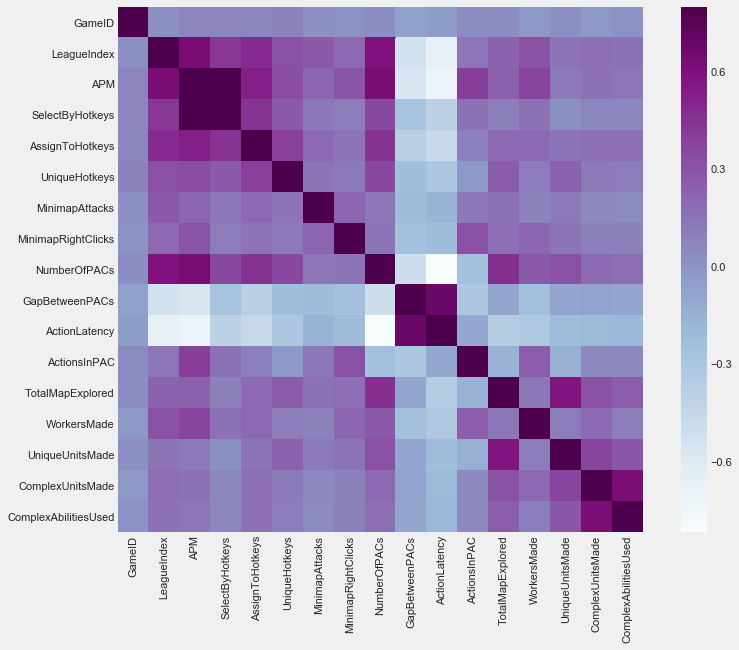

In [72]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True ,cmap="BuPu")

Text(0.5, 1.0, 'Age by League')

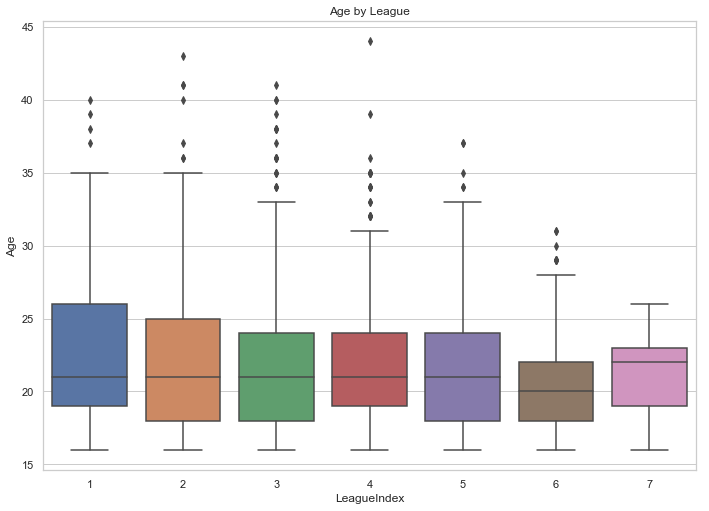

In [35]:
#correct the problem  and change the palette for all boxplot 

sns.boxplot(x = "LeagueIndex", y = df["Age"].astype(float), data = df).set_title("Age by League")

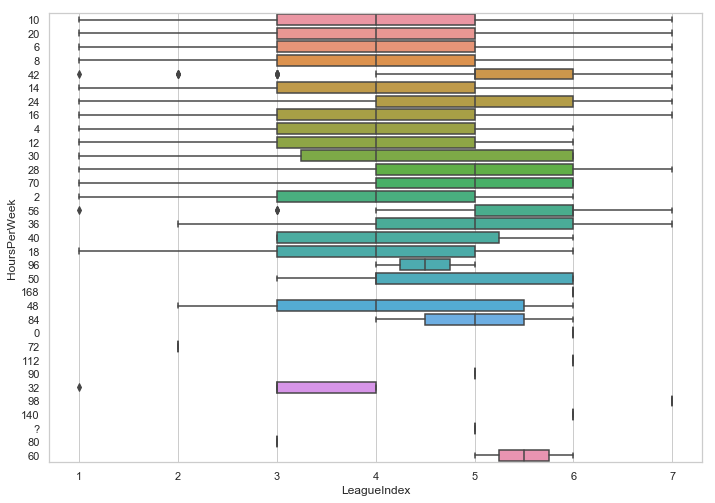

In [49]:
# figure out why this is displaying like this 
sns.boxplot(x="LeagueIndex", y="HoursPerWeek", data=df)

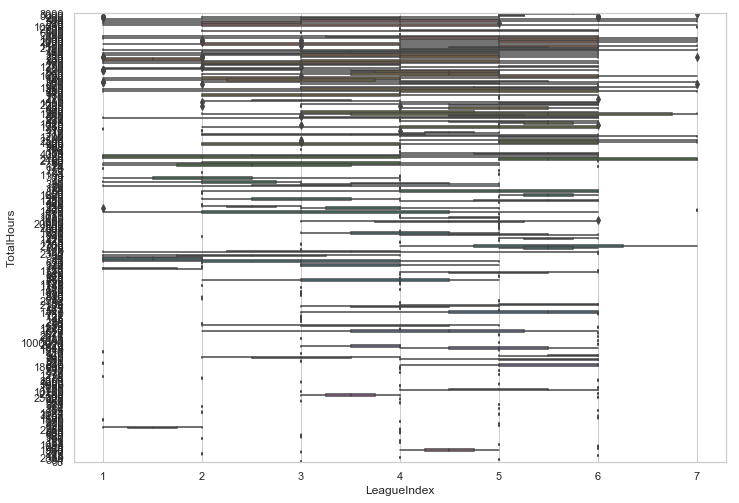

In [51]:
sns.boxplot(x="LeagueIndex", y="TotalHours", data=df)

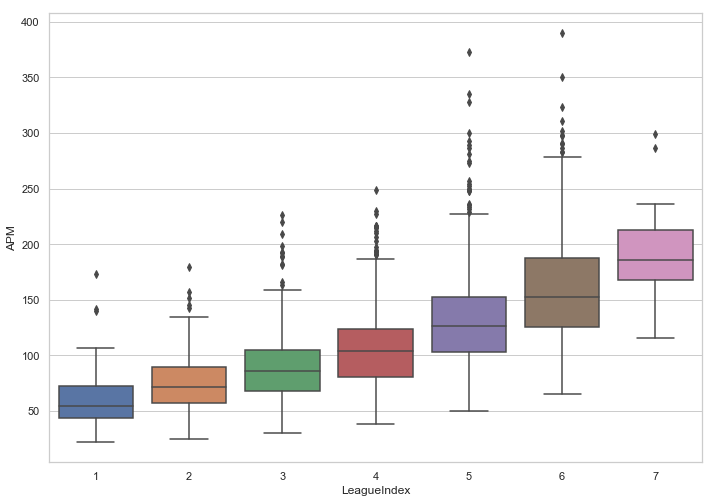

In [38]:
sns.boxplot(x="LeagueIndex", y="APM", data=df)

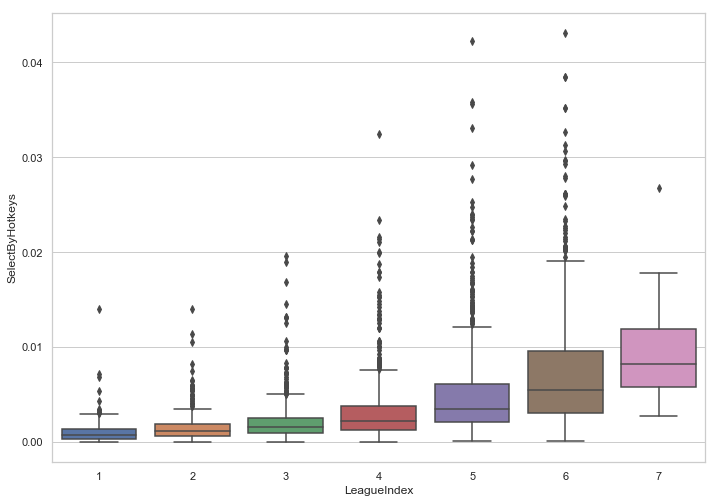

In [52]:
sns.boxplot(x="LeagueIndex", y="SelectByHotkeys", data=df)

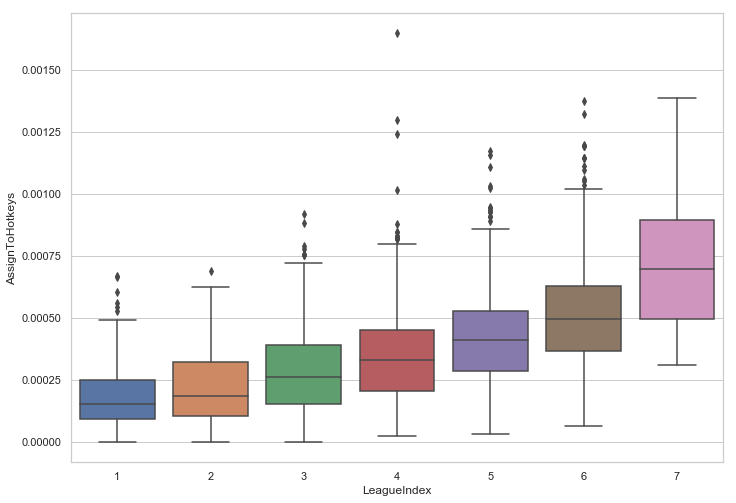

In [53]:
sns.boxplot(x="LeagueIndex", y="AssignToHotkeys", data=df)

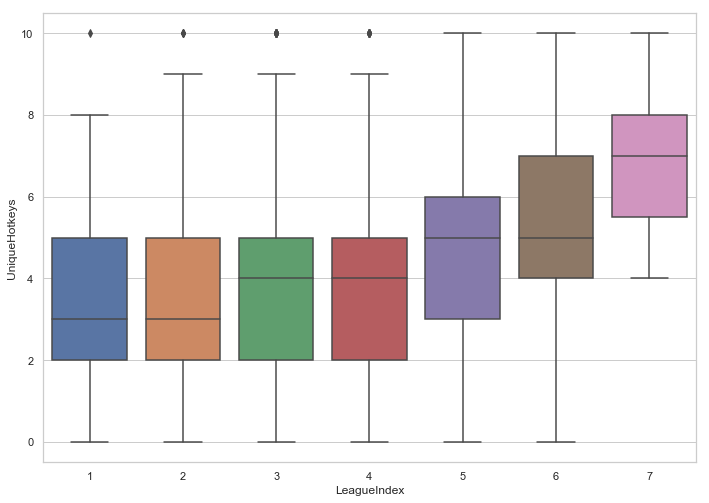

In [54]:
sns.boxplot(x="LeagueIndex", y="UniqueHotkeys", data=df)

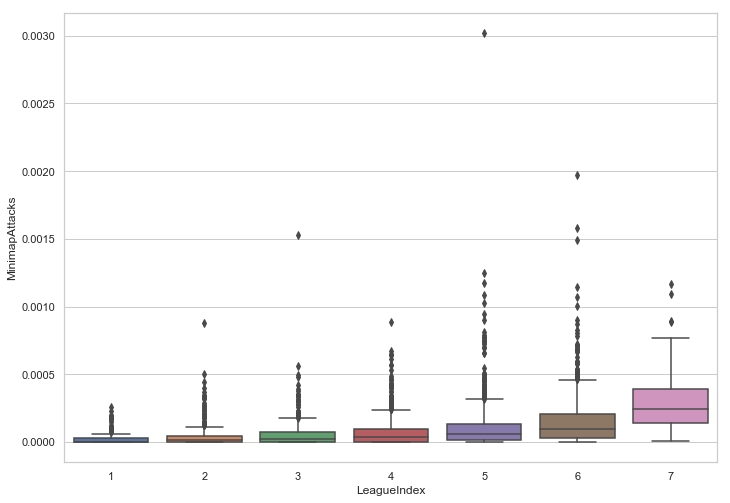

In [55]:
sns.boxplot(x="LeagueIndex", y="MinimapAttacks", data=df)

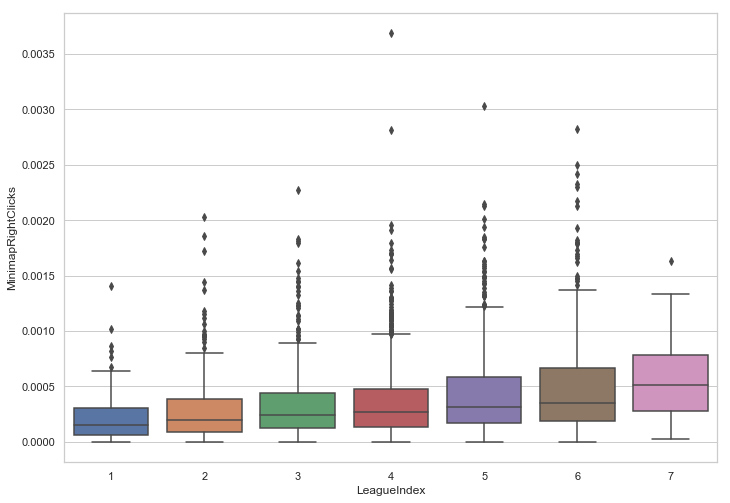

In [56]:
sns.boxplot(x="LeagueIndex", y="MinimapRightClicks", data=df)

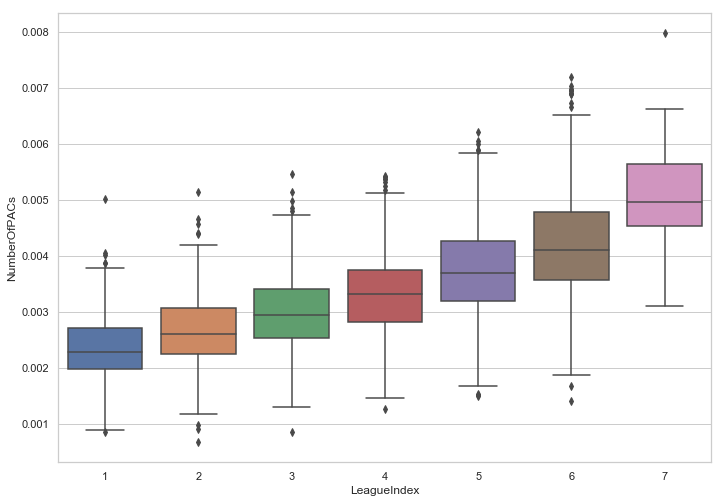

In [57]:
sns.boxplot(x="LeagueIndex", y="NumberOfPACs", data=df)

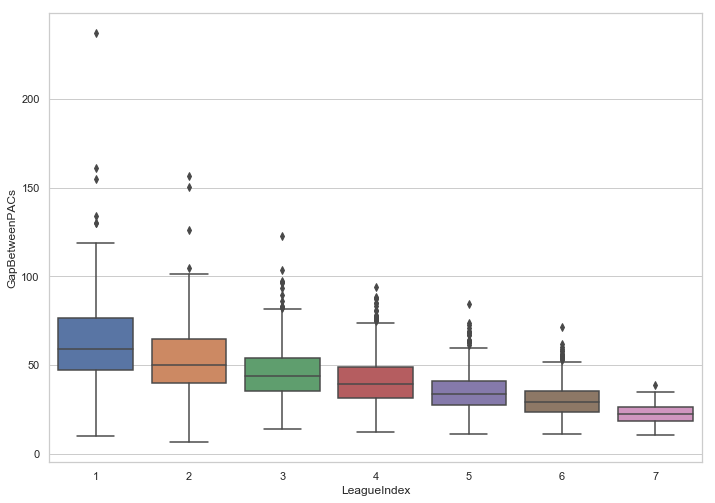

In [58]:
sns.boxplot(x="LeagueIndex", y="GapBetweenPACs", data=df)

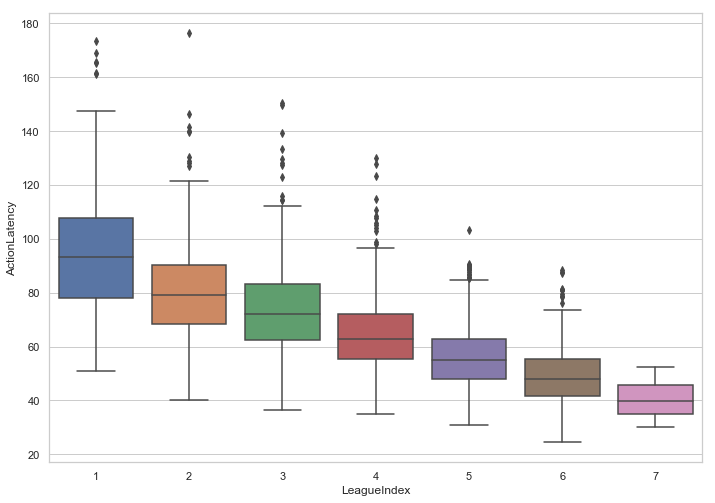

In [39]:
sns.boxplot(x="LeagueIndex", y="ActionLatency", data=df)

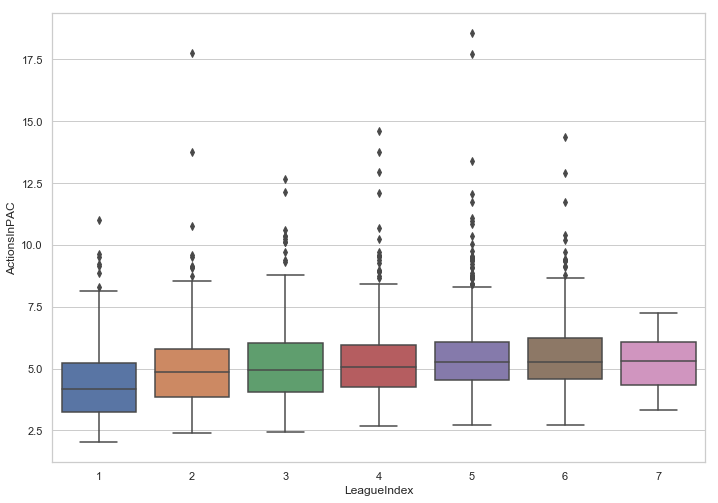

In [59]:
sns.boxplot(x="LeagueIndex", y="ActionsInPAC", data=df)

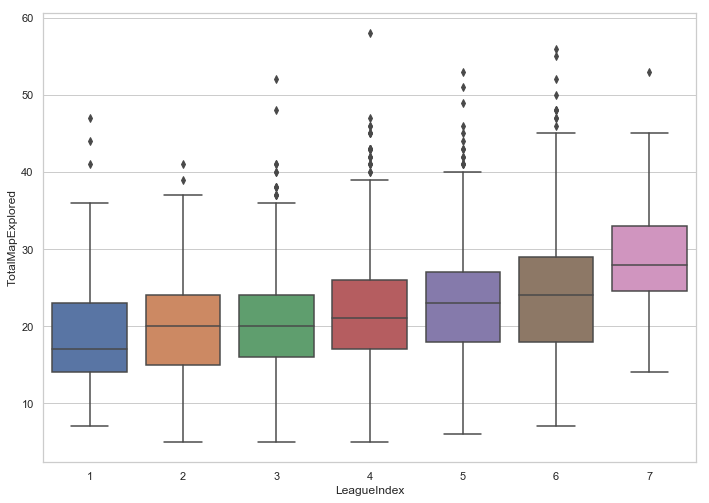

In [60]:
sns.boxplot(x="LeagueIndex", y="TotalMapExplored", data=df)

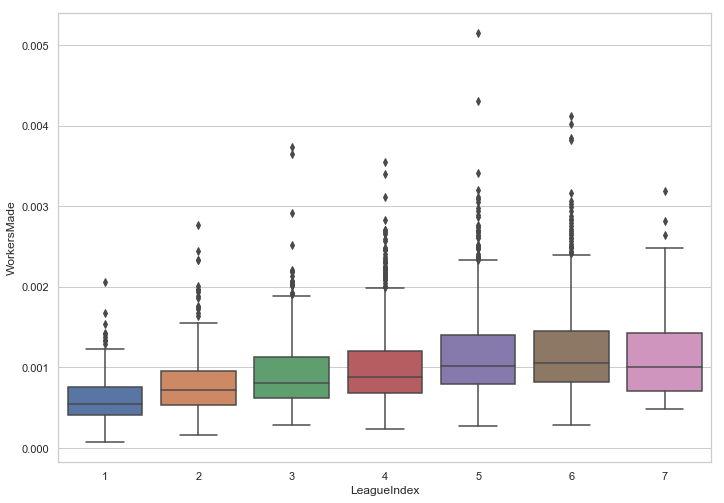

In [61]:
sns.boxplot(x="LeagueIndex", y="WorkersMade", data=df)

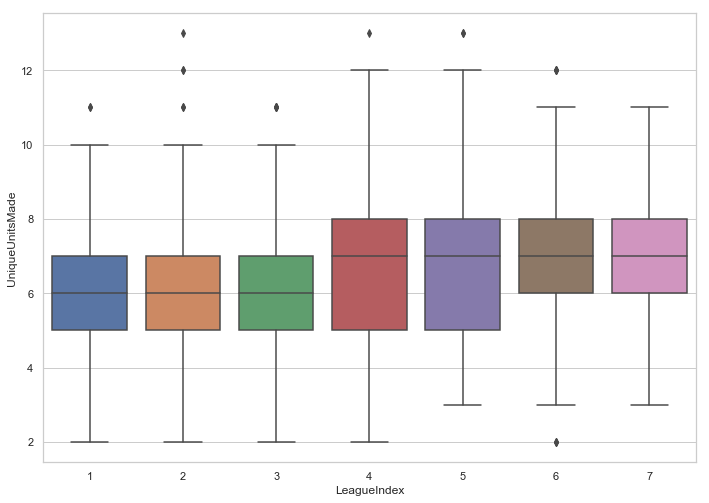

In [62]:
sns.boxplot(x="LeagueIndex", y="UniqueUnitsMade", data=df)

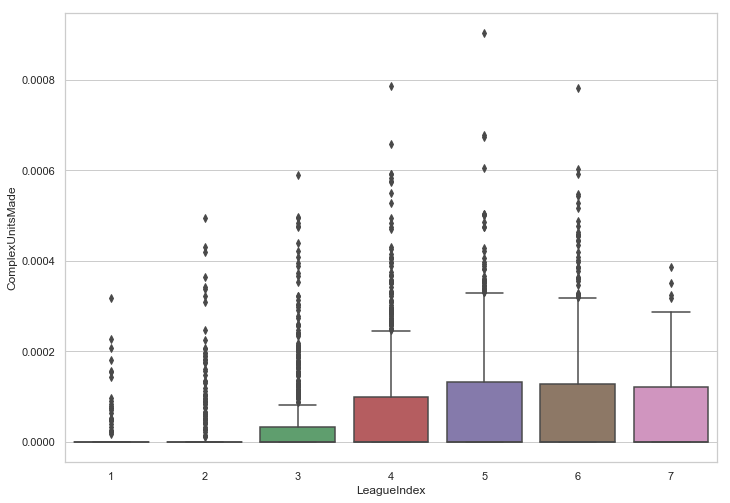

In [63]:
sns.boxplot(x="LeagueIndex", y="ComplexUnitsMade", data=df)

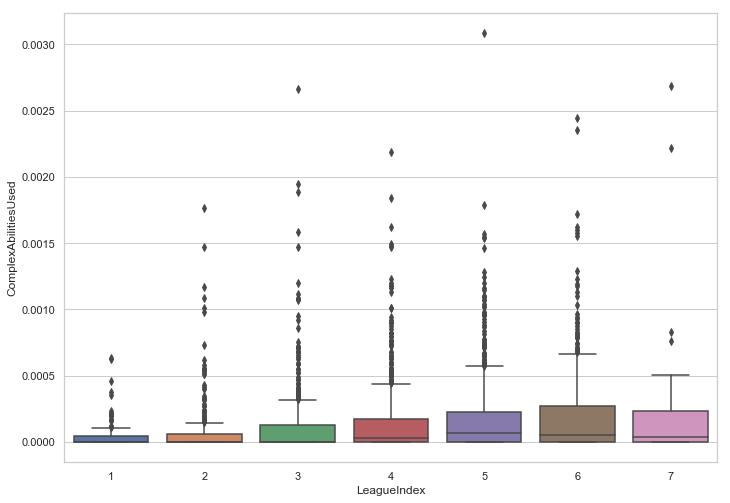

In [64]:
sns.boxplot(x="LeagueIndex", y="ComplexAbilitiesUsed", data=df)

In [24]:
# Specify histogram attributes
bins = np.arange(0, 9, 1)
weights = np.ones_like(df['LeagueIndex']) / len(df['LeagueIndex'])

Text(0.5, 1.0, 'Count')

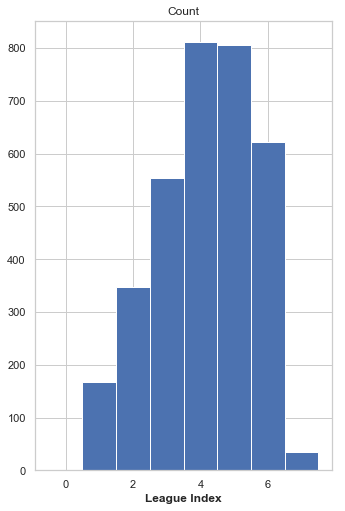

In [41]:
# Count Histogram
p1 = plt.subplot(1,2,1)
p1.hist(df['LeagueIndex'], bins=bins, align='left') # Pure Count
plt.xlabel('League Index', fontweight='bold')
plt.title('Count')

C:\Users\DarkOmega\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\Users\DarkOmega\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


[Text(0, 0, '0.0%'),
 Text(0, 0, '5.0%'),
 Text(0, 0, '10.0%'),
 Text(0, 0, '15.0%'),
 Text(0, 0, '20.0%'),
 Text(0, 0, '25.0%'),
 Text(0, 0, '30.0%')]

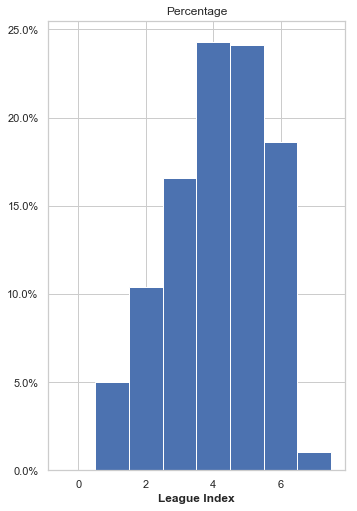

In [42]:
# Percentage Histogram
p2 = plt.subplot(1,2,2)
p2.hist(df['LeagueIndex'], bins=bins, weights = weights, align='left') # % of Total (weights)
plt.xlabel('League Index', fontweight='bold')
plt.title('Percentage', )
yvals = plt.subplot(1,2,2).get_yticks()
plt.subplot(1,2,2).set_yticklabels(['{:3.1f}%'.format(y*100) for y in yvals])

In [6]:
print("Percentages of leagues in total data:\n")
df['LeagueIndex'].value_counts(normalize=True)*100

Percentages of leagues in total data:



4    24.281437
5    24.131737
6    18.592814
3    16.556886
2    10.389222
1     5.000000
7     1.047904
Name: LeagueIndex, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000018AC4358>]],
      dtype=object)

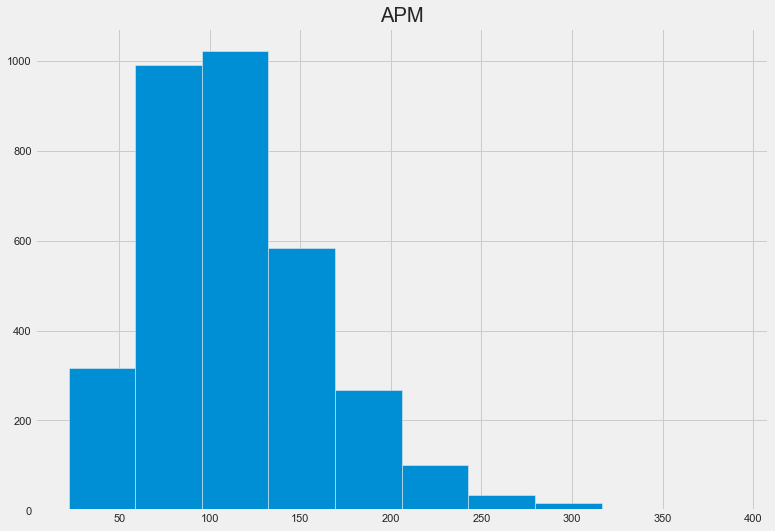

In [75]:
df.hist("APM")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000024BE1E10>,
      dtype=object)

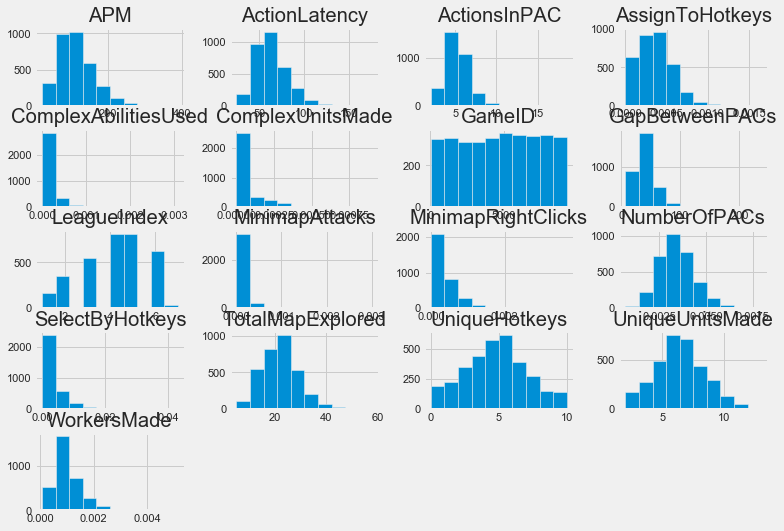

In [77]:
df.hist()

In [100]:
imp_features =['TotalHours', 'APM','SelectByHotkeys', 'AssignToHotkeys', 'NumberOfPACs','GapBetweenPACs', 'ActionLatency']

In [101]:
x_f =df.copy(deep=True)
x_f = x_f[imp_features]
y_f = df['LeagueIndex']
x_f.head()

,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,NumberOfPACs,GapBetweenPACs,ActionLatency
0,3000,143.7180,0.003515,0.000220,0.004849,32.6677,40.8673
1,5000,129.2322,0.003304,0.000259,0.004307,32.9194,42.3454
2,200,69.9612,0.001101,0.000336,0.002926,44.6475,75.3548
3,400,107.6016,0.001034,0.000213,0.003783,29.2203,53.7352
4,500,122.8908,0.001136,0.000327,0.002368,22.6885,62.0813


In [167]:
y_f.dtypes

dtype('int64')

In [132]:
x_f.tail()

,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,NumberOfPACs,GapBetweenPACs,ActionLatency
3335,400,158.1390,0.013829,0.000504,0.003583,36.3990,66.2718
3336,1500,186.1320,0.006951,0.000360,0.005414,22.8615,34.7417
3337,100,121.6992,0.002956,0.000241,0.003690,35.5833,57.9585
3338,400,134.2848,0.005424,0.000182,0.003205,18.2927,62.4615
3339,400,88.8246,0.000844,0.000108,0.003099,45.1512,63.4435


In [122]:
x_f.isnull().sum()

TotalHours         0
APM                0
SelectByHotkeys    0
AssignToHotkeys    0
NumberOfPACs       0
GapBetweenPACs     0
ActionLatency      0
dtype: int64

In [153]:
x_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3340 entries, 0 to 3339
Data columns (total 7 columns):
TotalHours         3338 non-null float32
APM                3340 non-null float64
SelectByHotkeys    3340 non-null float64
AssignToHotkeys    3340 non-null float64
NumberOfPACs       3340 non-null float64
GapBetweenPACs     3340 non-null float64
ActionLatency      3340 non-null float64
dtypes: float32(1), float64(6)
memory usage: 195.7 KB


In [148]:
cols = x_f.select_dtypes(exclude=['float']).columns

x_f[cols] = x_f[cols].apply(pd.to_numeric, downcast='float', errors='coerce')

In [151]:
x_f.astype({'TotalHours': 'float64'}).dtypes

TotalHours         float64
APM                float64
SelectByHotkeys    float64
AssignToHotkeys    float64
NumberOfPACs       float64
GapBetweenPACs     float64
ActionLatency      float64
dtype: object

In [173]:
y_f.astype({'LeagueIndex': 'float64'}).dtypes

dtype('float64')

In [180]:
y_f.astype('float64').dtypes

dtype('float64')

In [182]:
y_f.dtype

dtype('int64')

In [177]:
y_f

0       5
1       5
2       4
3       3
4       3
5       2
6       1
7       7
8       4
9       4
10      3
11      4
12      3
13      3
14      5
15      5
16      4
17      5
18      5
19      4
20      5
21      6
22      5
23      5
24      4
25      4
26      6
27      5
28      5
29      6
       ..
3310    5
3311    4
3312    2
3313    4
3314    2
3315    5
3316    1
3317    5
3318    3
3319    3
3320    2
3321    6
3322    4
3323    4
3324    2
3325    2
3326    6
3327    5
3328    6
3329    5
3330    3
3331    4
3332    6
3333    4
3334    4
3335    4
3336    5
3337    4
3338    3
3339    4
Name: LeagueIndex, Length: 3340, dtype: int64

In [178]:
x_f

,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,NumberOfPACs,GapBetweenPACs,ActionLatency
0,3000.0,143.7180,0.003515,0.000220,0.004849,32.6677,40.8673
1,5000.0,129.2322,0.003304,0.000259,0.004307,32.9194,42.3454
2,200.0,69.9612,0.001101,0.000336,0.002926,44.6475,75.3548
3,400.0,107.6016,0.001034,0.000213,0.003783,29.2203,53.7352
4,500.0,122.8908,0.001136,0.000327,0.002368,22.6885,62.0813
5,70.0,44.4570,0.000978,0.000255,0.002425,76.4405,98.7719
6,240.0,46.9962,0.000820,0.000169,0.001988,94.0227,90.5311
7,10000.0,212.6022,0.009040,0.000676,0.004952,24.6117,41.7671
8,2708.0,117.4884,0.002944,0.000527,0.005399,52.0140,46.4321
9,800.0,155.9856,0.005054,0.000524,0.003569,24.4632,52.1538


In [176]:
y_f['LeagueIndex']=y_f.LeagueIndex.astype(float)

AttributeError: 'Series' object has no attribute 'LeagueIndex'

In [152]:
print(x_f.dtypes)

TotalHours         float32
APM                float64
SelectByHotkeys    float64
AssignToHotkeys    float64
NumberOfPACs       float64
GapBetweenPACs     float64
ActionLatency      float64
dtype: object


In [156]:
x_f['TotalHours']=x_f.TotalHours.astype(float)

In [157]:
x_f.dtypes

TotalHours         float64
APM                float64
SelectByHotkeys    float64
AssignToHotkeys    float64
NumberOfPACs       float64
GapBetweenPACs     float64
ActionLatency      float64
dtype: object

In [143]:
x_f.fillna(0)

,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,NumberOfPACs,GapBetweenPACs,ActionLatency
0,3000.0,143.7180,0.003515,0.000220,0.004849,32.6677,40.8673
1,5000.0,129.2322,0.003304,0.000259,0.004307,32.9194,42.3454
2,200.0,69.9612,0.001101,0.000336,0.002926,44.6475,75.3548
3,400.0,107.6016,0.001034,0.000213,0.003783,29.2203,53.7352
4,500.0,122.8908,0.001136,0.000327,0.002368,22.6885,62.0813
5,70.0,44.4570,0.000978,0.000255,0.002425,76.4405,98.7719
6,240.0,46.9962,0.000820,0.000169,0.001988,94.0227,90.5311
7,10000.0,212.6022,0.009040,0.000676,0.004952,24.6117,41.7671
8,2708.0,117.4884,0.002944,0.000527,0.005399,52.0140,46.4321
9,800.0,155.9856,0.005054,0.000524,0.003569,24.4632,52.1538


In [160]:
x_f =x_f[~x_f.isin([np.nan, np.inf, -np.inf]).any(1)]

In [183]:
y_f =y_f[~y_f.isin([np.nan, np.inf, -np.inf]).any(1)]

ValueError: No axis named 1 for object type <class 'type'>

In [169]:
lin_model = svm.LinearSVC()
lin_model = lin_model.fit(x_f, y_f)
print('SVM Score:', lin_model.score(x_f, y_f))
predicted = lin_model.predict(x_f)
print(sorted(pd.unique(predicted)))

ValueError: Found input variables with inconsistent numbers of samples: [3338, 3340]

In [171]:
from sklearn.naive_bayes import GaussianNB
# Naive Bayes Model
bayes_model = GaussianNB()

bayes_model.fit(x_f, y_f)
bayes_model.score(x_f, y_f)

ValueError: Found input variables with inconsistent numbers of samples: [3338, 3340]